## **Project Objective : Customer Segmentation for Personalized Marketing**
## **in Food Delivery Services using Clustering and PCA**

________________________________________________________________________________
In today’s competitive food delivery market, users behave very differently:
Some order frequently, some spend more, some are younger, and some prefer specific cuisines. Without understanding these differences, businesses can't market or serve them effectively.

________________________________________________________________________________
## ***What is the goal?***
The goal of this project is to group (cluster) similar users together based on their behavior and personal details — like:

*   How often they order
*   How much they spend
*   How long they use the app
*   Their age and food preferences

We use unsupervised machine learning (clustering) to find these hidden user groups without needing any labeled data.

--------------------------------------------------------------------------------
## **What will we do in this project?**
## **1.Understand the Data:**
*   Load real food delivery user data.
*   Check features like age, spend, total orders, and cuisine preference.
*   Explore patterns and relationships between variables.

## **2.Preprocess the Data:**
*  Convert non-numeric data (like favorite cuisine) into numbers.
*  Scale the data so all features are equally important.
*  Reduce data complexity using PCA (Principal Component Analysis) for better   visualization.

## **3.Apply Clustering Techniques:**
*  Use algorithms like K-Means and DBSCAN to form clusters (groups) of similar users.
*  Visualize these clusters in 2D space using the reduced data.

## **4.Interpret the Results:**
*  Understand what each group of users looks like
*  Show how this can help personalize marketing, improve services, and boost user engagement.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
df=pd.read_csv("/content/food_delivery.csv")

In [ ]:
df.head()

,UserID,Age,TotalOrders,AverageSpend,FavoriteCuisine,DeliveryRating,AppUsageTimePerDay
0,1,56,37,312.70,Mexican,4.6,20.9
1,2,46,34,193.97,Mexican,3.0,150.2
2,3,32,22,291.66,Mexican,4.1,59.7
3,4,25,30,232.21,Thai,3.7,85.5
4,5,38,27,244.84,Italian,4.7,13.7


The dataset contains information about individual users of a food delivery app. Each row represents one user, and the columns describe their behavior and preferences:

**UserID:** Unique identifier for each user

**Age:** Age of the user

**TotalOrders:** Total number of orders placed by the user

**AverageSpend:** Average amount spent per order

**FavoriteCuisine:** The user's most preferred cuisine

**DeliveryRating:** The average delivery rating given by the user

**AppUsageTimePerDay:** Time spent on the app per day

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   UserID              500 non-null    int64  
 1   Age                 500 non-null    int64  
 2   TotalOrders         500 non-null    int64  
 3   AverageSpend        500 non-null    float64
 4   FavoriteCuisine     500 non-null    object 
 5   DeliveryRating      500 non-null    float64
 6   AppUsageTimePerDay  500 non-null    float64
dtypes: float64(3), int64(3), object(1)
memory usage: 27.5+ KB


## The dataset consists of 500 user records with 7 features, each describing aspects of user behavior and preferences within a food delivery app

In [ ]:
# The df.isna() function checks for missing  values in the dataset.
# It returns a DataFrame of the same shape, where each cell contains:

# True → if the original value is missing

# False → if the value is present

df.isna()

,UserID,Age,TotalOrders,AverageSpend,FavoriteCuisine,DeliveryRating,AppUsageTimePerDay
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
495,False,False,False,False,False,False,False
496,False,False,False,False,False,False,False
497,False,False,False,False,False,False,False
498,False,False,False,False,False,False,False


In [ ]:
# describe() is used to generate summary statistics for the numerical columns in a DataFrame.
#  It gives a quick snapshot of the data's central tendency, spread, and shape, which helps us understand the distribution and behavior of each feature.

df.describe()

,UserID,Age,TotalOrders,AverageSpend,DeliveryRating,AppUsageTimePerDay
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,39.326000,29.714000,306.584680,3.759400,93.515400
std,144.481833,12.200386,5.747196,74.732407,0.731794,48.472478
min,1.000000,18.000000,14.000000,80.900000,2.500000,10.100000
25%,125.750000,29.000000,25.000000,256.685000,3.100000,49.325000
50%,250.500000,41.000000,30.000000,305.170000,3.800000,93.100000
75%,375.250000,50.000000,33.000000,355.870000,4.400000,137.275000
max,500.000000,59.000000,47.000000,539.480000,5.000000,179.900000


* ## The dataset contains 500 users with no missing values.
* ## Age ranges from 18 to 59, with an average of around 39 years.
* ## Users have placed 14 to 47 total orders, with a median of 30.
* ## The average spend per order varies widely (₹80.9 to ₹539.5), with a mean of ₹306.6.
* ## Delivery ratings are generally high, with most users rating between 3 and 5.
* ## App usage time per day ranges from 10 to 180 minutes, showing diverse engagement levels.

In [ ]:
# In machine learning, most algorithms (especially clustering or distance-based models) can only work with numerical data, not text or categories.

# The column FavoriteCuisine in your dataset contains categorical string values like "Mexican", "Thai", "Italian" — and these need to be converted

# into numbers so that algorithms like K-Means or PCA can process them.

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

df['FavoriteCuisine']=le.fit_transform(df['FavoriteCuisine'])

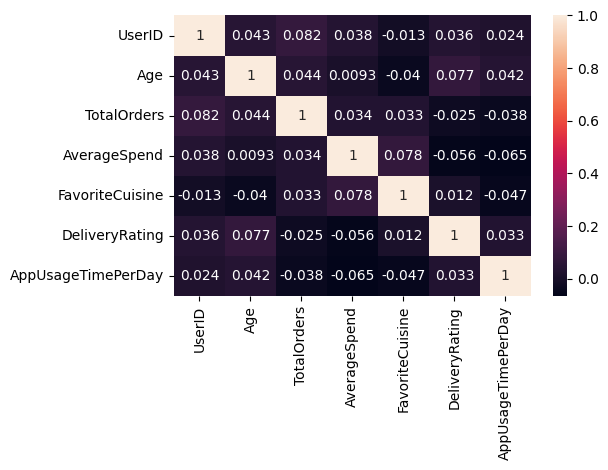

In [ ]:
corr=df.corr()
sns.heatmap(corr,annot=True)
plt.tight_layout()

The heatmap above shows the correlation coefficients between all pairs of numerical features in the dataset.

* Values range from -1 to +1:

  * +1: Strong positive correlation (both increase together)

  * -1: Strong negative correlation (one increases while the other decreases)

  *  0: No linear relationship

--> Most features have very weak or no correlation, meaning they are independent.

--> AverageSpend has a slight positive correlation with FavoriteCuisine (0.078).

--> AppUsageTimePerDay has a slight negative correlation with AverageSpend (-0.065).

--> Overall, the features are suitable for clustering since they provide unique information.

In [ ]:
x=df.drop(['UserID'],axis=1)


In [ ]:
# Standardize the features to have zero mean and unit variance
# This is important for PCA and clustering algorithms to perform correctly

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x=sc.fit_transform(x)

In [ ]:
# Apply PCA to reduce data to 2 dimensions for easier visualization
# PCA helps capture the most important variance while simplifying the data

from sklearn.decomposition import PCA

pca=PCA(n_components=2)
x_pca=pca.fit_transform(x)

In [ ]:
# Apply KMeans clustering to group users into 3 clusters
# The algorithm assigns each point to the nearest cluster center based on distance

from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
kmean=KMeans(n_clusters=3)
kmean_labels=kmean.fit_predict(x)

In [ ]:
# Transform the KMeans cluster centers into 2D PCA space
# This allows us to plot the centroids on the same PCA scatter plot

contreiod_pca=pca.transform(kmean.cluster_centers_)

Text(0.5, 1.0, 'K-Means Clustering')

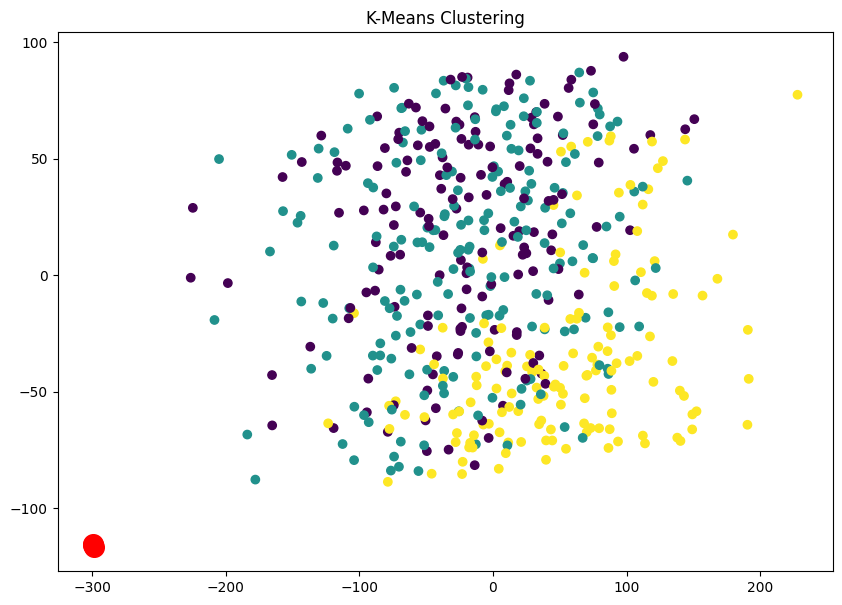

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(x=x_pca[:,0],y=x_pca[:,1],c=kmean_labels)
plt.scatter(contreiod_pca[:,0],contreiod_pca[:,1],marker='o',c='red',s=200)

plt.title('K-Means Clustering')

## **K-Means Clustering Visualization (PCA Reduced)**
## The scatter plot above shows the results of K-Means clustering applied to the user data after dimensionality reduction using PCA (2 components).

## Each point represents a user, plotted in the 2D PCA space.

## Colors represent the 3 different clusters assigned by the K-Means algorithm.

## The large red circle marks one of the cluster centroids (center of a group).

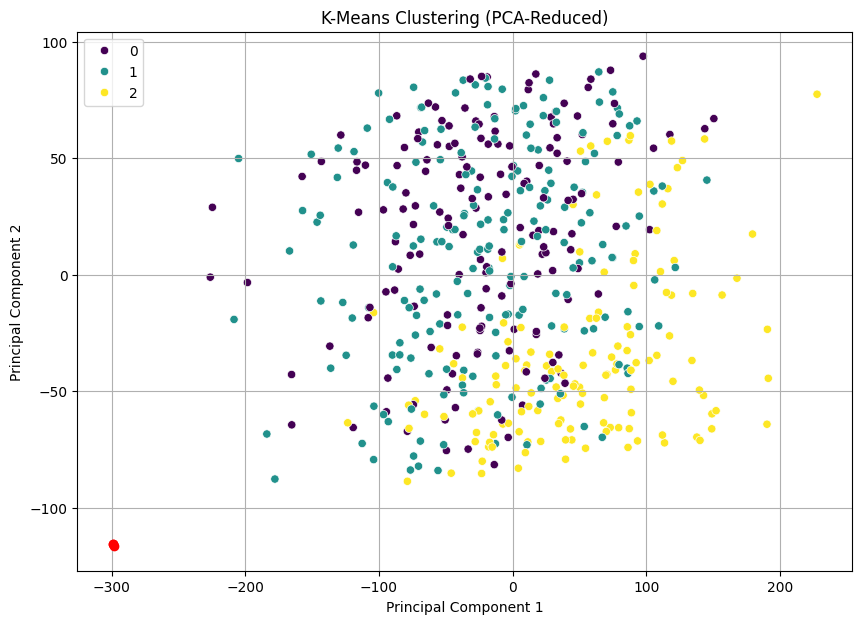

In [ ]:
# plt.figure(figsize=(10,7))
# sns.scatterplot(x_new=x_pca[:,0],y=x_pca[:,1],hue=kmean_labels,palette='virdis')
# plt.plot(contreiod_pca[:,0],contreiod_pca[:,1],marker='o',color='red')
# plt.xlabel('PC1')
# plt.ylabel('PC2')
# plt.title('K-Means Clustering')

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], hue=kmean_labels, palette='viridis')
plt.plot(contreiod_pca[:,0],contreiod_pca[:,1],marker='o',color='red')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering (PCA-Reduced)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#  DBSCAN is a clustering algorithm that groups data based on how close the points are to each other.

db= DBSCAN(eps=1.5, min_samples = 5)
db_labels=db.fit_predict(x)

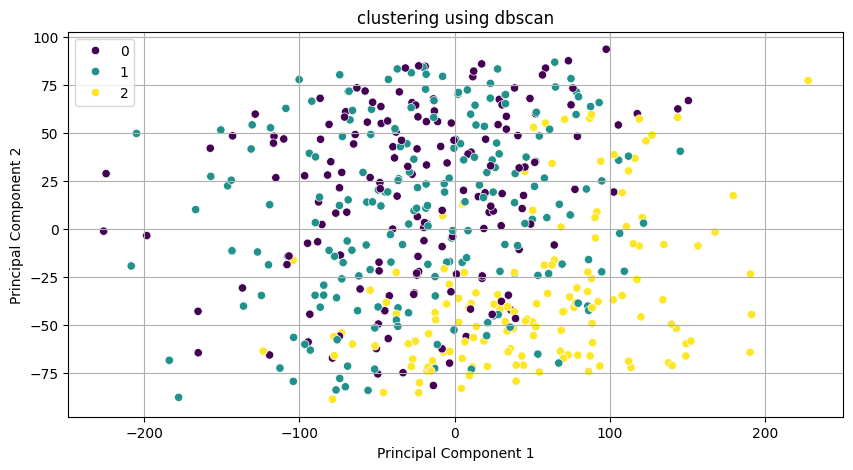

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=x_pca[:, 0], y=x_pca[:, 1], hue=kmean_labels, palette='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('clustering using dbscan')
plt.legend()
plt.grid(True)
plt.show()

## **DBSCAN Clustering Visualization**
## This scatter plot shows the result of DBSCAN clustering applied to PCA-reduced user data:

## Each point represents a user in 2D PCA space.
## DBSCAN forms clusters based on density, so users close together form groups.
## It also identifies outliers.

# **Final Outcome:**
## Through this project, we explored and analyzed user behavior data from a food delivery platform using unsupervised learning techniques. Our primary goal was to identify distinct user groups that can help the business tailor its offerings and marketing strategies more effectively.

# **Insights Gained:**
## Different user clusters were identified based on spending habits, order frequency, and app engagement.

## DBSCAN helped detect natural groupings and possible outliers in the data.

## PCA visualization made it easier to observe patterns and compare clustering results.

